Мини-анализ данных об аренде велосипедов в Лондоне за период с 4 января 2015 по 3 января 2017!Изучим динамику числа аренд, наличие связи с погодными условиями и выходными, а также объясним несколько аномалий на графике.
<br>

**Описание данных**<br>
timestamp – дата и время (точность до часа)<br>
cnt – количество аренд велосипедов за этот час<br>
t1 – температура, в С<br>
t2 – температура "ощущается как", в С <br>
hum – влажность (%)<br>
wind_speed – скорость ветра, км/ч<br>
weather_code – погодные условия<br>
&nbsp;&nbsp;1 – ясно (SKC)<br>
&nbsp;&nbsp;2 – преимущественно ясно / встречаются отдельные облака (SCT)<br>
&nbsp;&nbsp;3 – облачно / значительные облака (BKN)<br>
&nbsp;&nbsp;4 – пасмурно (OVC)<br>
&nbsp;&nbsp;7 – небольшой дождь Rain/ light Rain shower/ Light rain <br>
&nbsp;&nbsp;10 – дождь с грозой<br>
&nbsp;&nbsp;26 – снегопад <br>
&nbsp;&nbsp;94 – ледяной туман (да, такое бывает!)<br>
isholiday – является ли день праздником (1 – праздник, 0 – нет)<br>
isweekend –  является ли день выходным (1 – выходной, 0 – нет)<br>
season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)<br>

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [41]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/384464/london.csv',parse_dates=['timestamp'])
data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [8]:
data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [10]:
data.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

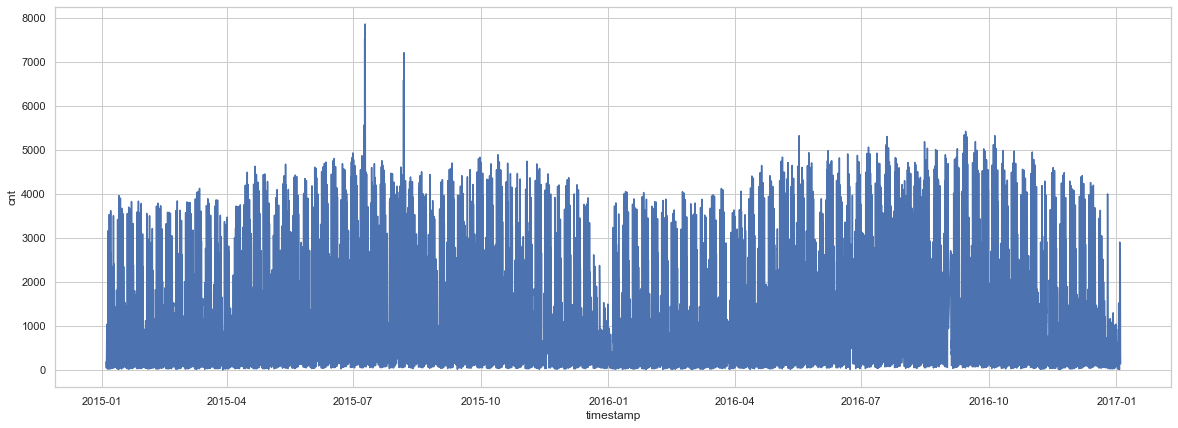

In [14]:
# Построим график по числу поездок по дате и времени

sns.set(style='whitegrid',rc={'figure.figsize':(25,10)})
sns.lineplot(data = data, x='timestamp',y='cnt')

In [3]:
data1 = data[['timestamp','cnt']]
data1

,timestamp,cnt
0,2015-01-04 00:00:00,182
1,2015-01-04 01:00:00,138
2,2015-01-04 02:00:00,134
3,2015-01-04 03:00:00,72
4,2015-01-04 04:00:00,47
...,...,...
17409,2017-01-03 19:00:00,1042
17410,2017-01-03 20:00:00,541
17411,2017-01-03 21:00:00,337
17412,2017-01-03 22:00:00,224


In [4]:
# Агрегируем число поездок по дням и визуализируем результат

data1 = data1.resample(rule='D',on='timestamp').cnt.sum().to_frame().reset_index()
data1

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
726,2016-12-30,11566
727,2016-12-31,11424
728,2017-01-01,6421
729,2017-01-02,11823


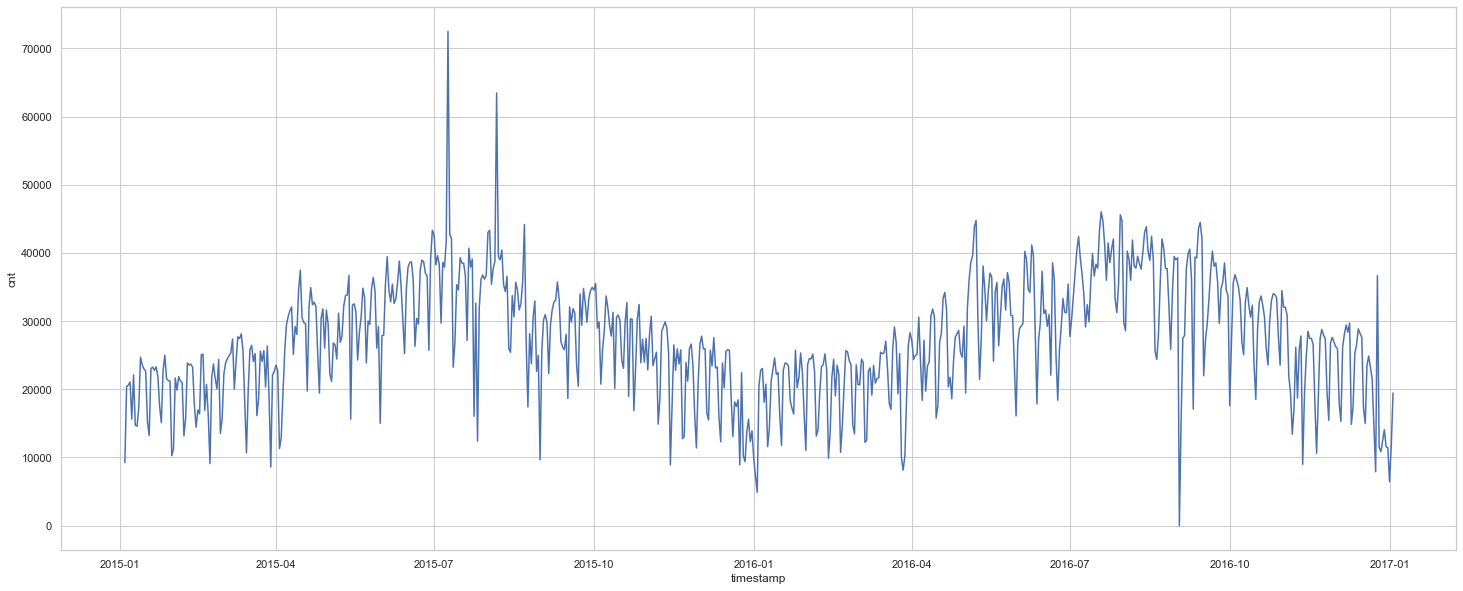

In [32]:
sns.lineplot(data = data1, x='timestamp',y='cnt')

In [5]:
# Посчитаем скользящее среднее с окном 3

data1['roll'] = data1.cnt.rolling(3).mean()
data1

,timestamp,cnt,roll
0,2015-01-04,9234,NaN
1,2015-01-05,20372,NaN
2,2015-01-06,20613,16739.666667
3,2015-01-07,21064,20683.000000
4,2015-01-08,15601,19092.666667
...,...,...,...
726,2016-12-30,11566,12682.000000
727,2016-12-31,11424,12347.333333
728,2017-01-01,6421,9803.666667
729,2017-01-02,11823,9889.333333


In [37]:
data1.query("timestamp == '2015-07-09'")

,timestamp,cnt,roll
186,2015-07-09,72504,50705.0


In [6]:
# Теперь посчитаем разницу между наблюдаемыми и подсчитанными значениями

data1['diff'] = data1['cnt'] - data1['roll']
data1

,timestamp,cnt,roll,diff
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,16739.666667,3873.333333
3,2015-01-07,21064,20683.000000,381.000000
4,2015-01-08,15601,19092.666667,-3491.666667
...,...,...,...,...
726,2016-12-30,11566,12682.000000,-1116.000000
727,2016-12-31,11424,12347.333333,-923.333333
728,2017-01-01,6421,9803.666667,-3382.666667
729,2017-01-02,11823,9889.333333,1933.666667


In [7]:
# Посчитаем стандартное отклонение 

np.round(np.std(data1['diff']),2)

4558.59

In [48]:
np.std(data1['diff'])

4558.586641117938

In [8]:
# Для каждого наблюдения посчитаем доверительные интервалы (99%):

data1['upper'] = data1.roll + 2.576 * np.std(data1['diff'])
data1['lower'] = data1.roll - 2.576 * np.std(data1['diff'])
data1

,timestamp,cnt,roll,diff,upper,lower
0,2015-01-04,9234,NaN,NaN,NaN,NaN
1,2015-01-05,20372,NaN,NaN,NaN,NaN
2,2015-01-06,20613,16739.666667,3873.333333,28482.585854,4996.747479
3,2015-01-07,21064,20683.000000,381.000000,32425.919188,8940.080812
4,2015-01-08,15601,19092.666667,-3491.666667,30835.585854,7349.747479
...,...,...,...,...,...,...
726,2016-12-30,11566,12682.000000,-1116.000000,24424.919188,939.080812
727,2016-12-31,11424,12347.333333,-923.333333,24090.252521,604.414146
728,2017-01-01,6421,9803.666667,-3382.666667,21546.585854,-1939.252521
729,2017-01-02,11823,9889.333333,1933.666667,21632.252521,-1853.585854


In [15]:
# Выведем наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала

data1.query("cnt > upper")

,timestamp,cnt,roll,diff,upper,lower
186,2015-07-09,72504,50705.000000,21799.000000,62447.919188,38962.080812
214,2015-08-06,63468,46627.333333,16840.666667,58370.252521,34884.414146
609,2016-09-04,27512,14259.000000,13253.000000,26001.919188,2516.080812
721,2016-12-25,36653,19650.666667,17002.333333,31393.585854,7907.747479


In [14]:
data1[data1['cnt'] > data1['upper']]

,timestamp,cnt,roll,diff,upper,lower
186,2015-07-09,72504,50705.000000,21799.000000,62447.919188,38962.080812
214,2015-08-06,63468,46627.333333,16840.666667,58370.252521,34884.414146
609,2016-09-04,27512,14259.000000,13253.000000,26001.919188,2516.080812
721,2016-12-25,36653,19650.666667,17002.333333,31393.585854,7907.747479


Аномально высокое число аренд 2015-07-09 было из-за забастовки метро :3

In [44]:
data2 = data
data2.timestamp = data2.timestamp.dt.strftime('%Y-%m-%d')
data2

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [48]:
data2[data2['timestamp'] == '2016-09-02']

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season


Анамольно низкое число аренд связано с ошибкой в данных - нет данных для 2016-09-02